In [2]:
## Execute lecture2.py
## Import all packages and functions defined in lecture2.py

# %run lecture2.py

In [3]:
# from lecture2 import *


# pandas_example()
# numpy_example()

In [4]:
from lecture2 import numpy_example

# pandas_example() # Error: name 'pandas_example' is not defined
numpy_example()

NumPy Array:
[[1 2 3]
 [4 5 6]]


## Pandas

#### Options : *index_col*, *header*, *na_values*

In [5]:
import pandas as pd

# Createa Dataframe with event data from a CSV file
event_data = pd.read_csv('data/uc_berkeley_events.csv', index_col='Year')
print(event_data)

# Setting header
# Default header=0 (first row as header)
event_data = pd.read_csv('data/uc_berkeley_events.csv', header=None)
print(event_data)


# Handling missing values - If there are multiple formats for missing values, you can specify them all.
missing_formats = ['N/A', '--', 'Not Available', 'NA']
event_data = pd.read_csv('data/uc_berkeley_events.csv', na_values=missing_formats)

# You can also specify different missing value formats for different columns.
# In the 'age' column, '?' means missing.
# In the 'score' column, -1 means missing.
missing_dict = {
    'age': ['?'],
    'score': [-1]
}
event_data = pd.read_csv('data/uc_berkeley_events.csv', na_values=missing_dict)

                                           Event      Location
Year                                                          
1868                     Founding of UC Berkeley  Berkeley, CA
1914                     Completion of Campanile  Berkeley, CA
1923                 Opening of Memorial Stadium  Berkeley, CA
1964                        Free Speech Movement  Berkeley, CA
2000  Opening of Hearst Memorial Mining Building  Berkeley, CA
      0                                           1             2
0  Year                                       Event      Location
1  1868                     Founding of UC Berkeley  Berkeley, CA
2  1914                     Completion of Campanile  Berkeley, CA
3  1923                 Opening of Memorial Stadium  Berkeley, CA
4  1964                        Free Speech Movement  Berkeley, CA
5  2000  Opening of Hearst Memorial Mining Building  Berkeley, CA


In [6]:
# Create a DataFrame with information about landmarks at UC Berkeley
data = {
    'Landmark': ['Sather Gate', 'Campanile', 'Doe Library', 'Memorial Glade', 'Sproul Plaza'],
    'Type': ['Gate', 'Tower', 'Library', 'Open Space', 'Plaza'],
    'Height': [30, 307, 80, 0, 0],
    'Year Built': [1910, 1914, 1911, None, 1962]
}

df = pd.DataFrame(data)
print("Pandas DataFrame:")
print(df)

Pandas DataFrame:
         Landmark        Type  Height  Year Built
0     Sather Gate        Gate      30      1910.0
1       Campanile       Tower     307      1914.0
2     Doe Library     Library      80      1911.0
3  Memorial Glade  Open Space       0         NaN
4    Sproul Plaza       Plaza       0      1962.0


In [7]:
print(df.head(2))
print(df.tail(2))
print(df.info())
print(df.describe())  # statistics for numerical columns


      Landmark   Type  Height  Year Built
0  Sather Gate   Gate      30      1910.0
1    Campanile  Tower     307      1914.0
         Landmark        Type  Height  Year Built
3  Memorial Glade  Open Space       0         NaN
4    Sproul Plaza       Plaza       0      1962.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Landmark    5 non-null      object 
 1   Type        5 non-null      object 
 2   Height      5 non-null      int64  
 3   Year Built  4 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes
None
           Height   Year Built
count    5.000000     4.000000
mean    83.400000  1924.250000
std    129.200619    25.223997
min      0.000000  1910.000000
25%      0.000000  1910.750000
50%     30.000000  1912.500000
75%     80.000000  1926.000000
max    307.000000  1962.000000


In [8]:
print(df.shape)
print(df.size)
print(df.columns)

print(df.sample(2))  # random sample of 2 rows

print(df.value_counts('Height'))
print(df['Height'].unique())

(5, 4)
20
Index(['Landmark', 'Type', 'Height', 'Year Built'], dtype='object')
      Landmark     Type  Height  Year Built
2  Doe Library  Library      80      1911.0
1    Campanile    Tower     307      1914.0
Height
0      2
30     1
80     1
307    1
Name: count, dtype: int64
[ 30 307  80   0]


### iloc vs loc

### **1. `iloc[]` - Integer-Location Based Indexing**
- Use `iloc[]` when you want to select data based on the integer positions of rows and columns.
- Think of it as using row and column numbers in a spreadsheet, starting from 0.
- **Examples:**
  - Select a specific cell: `df.iloc[0, 1]` (first row, second column).
  - Select a range of rows and columns: `df.iloc[1:3, 0:2]`.

---
### **2. `loc[]` - Label-Based Indexing**
- Use `loc[]` when you want to select data based on row and column labels.
- If you haven't set a custom index, the default integer index will be used, making it similar to `iloc[]`.
- If you have a custom index (e.g., names or dates), `loc[]` will use those labels.
- **Examples:**
  - Select a specific cell: `df.loc[0, 'Age']` (row with index `0`, column labeled `'Age'`).
  - Select a range of rows and columns: `df.loc[1:3, 'Name':'City']`.

---
### **3. Context-Dependent Selection**
- This method allows you to select data based on the context of your `DataFrame`.
- You can directly use column names to select entire columns or slices of rows.
- **Examples:**
  - Select a single column: `df['Name']`.
  - Select multiple columns: `df[['Name', 'Age']]`.
  - Select a range of rows: `df[1:3]`.

In [9]:
print(df)
display(df)

         Landmark        Type  Height  Year Built
0     Sather Gate        Gate      30      1910.0
1       Campanile       Tower     307      1914.0
2     Doe Library     Library      80      1911.0
3  Memorial Glade  Open Space       0         NaN
4    Sproul Plaza       Plaza       0      1962.0


,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30,1910.0
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0
3,Memorial Glade,Open Space,0,NaN
4,Sproul Plaza,Plaza,0,1962.0


In [10]:
# df[] 이건 iloc 과 loc 달리 행 열을 동시에 지정하는거너 안됨
# display(df[1:3, ["Landmark"]]) -> Error

display(df[1:2])
display(df[['Landmark', 'Height']]) # Columns 같은 경우 blackets을 2개 써야함

,Landmark,Type,Height,Year Built
1,Campanile,Tower,307,1914.0


,Landmark,Height
0,Sather Gate,30
1,Campanile,307
2,Doe Library,80
3,Memorial Glade,0
4,Sproul Plaza,0


### Series

In [11]:
welcome_series = pd.Series(["welcome", "to", "cs289"])

print(welcome_series)

print(welcome_series.values)
print(welcome_series.index)

0    welcome
1         to
2      cs289
dtype: object
['welcome' 'to' 'cs289']
RangeIndex(start=0, stop=3, step=1)


## Filtering

In [12]:
display(df[df['Height'] > 50])  # Filtering rows where Height > 50


## Multiple conditions 을 사용할 때는 & (and), | (or) 사용 위해 각 논리 마다 (괄호) 필요
display(df[(df['Height'] > 50) & (df['Type'] == 'Tower')])

## isin 사용
display(df[df['Type'].isin(['Gate', 'Plaza'])])

,Landmark,Type,Height,Year Built
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0


,Landmark,Type,Height,Year Built
1,Campanile,Tower,307,1914.0


,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30,1910.0
4,Sproul Plaza,Plaza,0,1962.0


## DataFrame Modification

### We an modify a DataFrame by:

1. Add new columns.
2. Perform calculations to create new data.
3. Modify existing values in your DataFrame.
4. Drop an existing column.

In [13]:
## Add new columns

df['Experience'] = [2, 5, 1, 8, 4]
display(df)

,Landmark,Type,Height,Year Built,Experience
0,Sather Gate,Gate,30,1910.0,2
1,Campanile,Tower,307,1914.0,5
2,Doe Library,Library,80,1911.0,1
3,Memorial Glade,Open Space,0,NaN,8
4,Sproul Plaza,Plaza,0,1962.0,4


In [14]:
## Add a calculated column

df['Height_Increase']=df['Height'] * 0.1
display(df)

,Landmark,Type,Height,Year Built,Experience,Height_Increase
0,Sather Gate,Gate,30,1910.0,2,3.0
1,Campanile,Tower,307,1914.0,5,30.7
2,Doe Library,Library,80,1911.0,1,8.0
3,Memorial Glade,Open Space,0,NaN,8,0.0
4,Sproul Plaza,Plaza,0,1962.0,4,0.0


In [15]:
## Modify existing values using .loc()

df.loc[df['Height_Increase']==0, 'Height_Increase'] = 1  # Set Height_Increase to 1 where it is currently 0)
display(df)

,Landmark,Type,Height,Year Built,Experience,Height_Increase
0,Sather Gate,Gate,30,1910.0,2,3.0
1,Campanile,Tower,307,1914.0,5,30.7
2,Doe Library,Library,80,1911.0,1,8.0
3,Memorial Glade,Open Space,0,NaN,8,1.0
4,Sproul Plaza,Plaza,0,1962.0,4,1.0


In [16]:
## Drop an existing column

df.drop(columns="Experience")
display(df)

df2 = df.drop(columns="Experience")  # To make the change permanent, assign the result to a new DataFrame or use inplace=True
display(df2)

df.drop(columns="Experience", inplace=True)
display(df)


,Landmark,Type,Height,Year Built,Experience,Height_Increase
0,Sather Gate,Gate,30,1910.0,2,3.0
1,Campanile,Tower,307,1914.0,5,30.7
2,Doe Library,Library,80,1911.0,1,8.0
3,Memorial Glade,Open Space,0,NaN,8,1.0
4,Sproul Plaza,Plaza,0,1962.0,4,1.0


,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,3.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,1.0


,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,3.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,1.0


### Sorting DataFrames

In [17]:
display(df.sort_values(by="Height", ascending=True))
display(df.sort_values(by=['Height', "Year Built"], ascending=[True, False]))
display(df.sort_values(by=['Height', "Type"], ascending=[True, False]))

,Landmark,Type,Height,Year Built,Height_Increase
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,1.0
0,Sather Gate,Gate,30,1910.0,3.0
2,Doe Library,Library,80,1911.0,8.0
1,Campanile,Tower,307,1914.0,30.7


,Landmark,Type,Height,Year Built,Height_Increase
4,Sproul Plaza,Plaza,0,1962.0,1.0
3,Memorial Glade,Open Space,0,NaN,1.0
0,Sather Gate,Gate,30,1910.0,3.0
2,Doe Library,Library,80,1911.0,8.0
1,Campanile,Tower,307,1914.0,30.7


,Landmark,Type,Height,Year Built,Height_Increase
4,Sproul Plaza,Plaza,0,1962.0,1.0
3,Memorial Glade,Open Space,0,NaN,1.0
0,Sather Gate,Gate,30,1910.0,3.0
2,Doe Library,Library,80,1911.0,8.0
1,Campanile,Tower,307,1914.0,30.7


### Copying DataFrames

In [18]:
display(df)

df1 = df.copy()  # Create a copy of the DataFrame
df2 = df1  # This does not create a copy; df2 is just another reference to df1

df2.loc[4, 'Height_Increase'] = 0

display(df)
display(df1)
display(df2)

,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,3.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,1.0


,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,3.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,1.0


,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,3.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,0.0


,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,3.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,0.0


### Handling Missing Values

1. Detect missing values in a DataFrame.
2. Quantify the extent of missing data.
3. Handle missing values by either removing or imputing them.

In [19]:
import numpy as np

df_missing = df.copy()
display(df_missing)

df_missing.loc[0, 'Year Built'] = np.nan
df_missing.loc[2, 'Height'] = np.nan
df_missing.loc[4, 'Type'] = None
display(df_missing)

,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,3.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,1.0


,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30.0,NaN,3.0
1,Campanile,Tower,307.0,1914.0,30.7
2,Doe Library,Library,NaN,1911.0,8.0
3,Memorial Glade,Open Space,0.0,NaN,1.0
4,Sproul Plaza,None,0.0,1962.0,1.0


In [20]:
## Check for missing values
display(df_missing.isnull())  # True where values are missing

## Count missing values in each column
display(df_missing.isnull().sum())  

,Landmark,Type,Height,Year Built,Height_Increase
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,True,False,False,False


Landmark           0
Type               1
Height             1
Year Built         2
Height_Increase    0
dtype: int64

In [21]:
## Drop rows with any missing values
display(df_missing.dropna())
print(f"Number of rows without missing values : {df_missing.dropna().shape[0]}")

,Landmark,Type,Height,Year Built,Height_Increase
1,Campanile,Tower,307.0,1914.0,30.7


Number of rows without missing values : 1


In [22]:
## Fill missing values with a specific value
display(df_missing.fillna(0))

,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30.0,0.0,3.0
1,Campanile,Tower,307.0,1914.0,30.7
2,Doe Library,Library,0.0,1911.0,8.0
3,Memorial Glade,Open Space,0.0,0.0,1.0
4,Sproul Plaza,0,0.0,1962.0,1.0


In [23]:
# Fills missing values in `df_missing` with defaults: mean for 'Year Built', median for 'Height', and 'Unknown' for 'Type', then displays the result.
display(df_missing.fillna({'Year Built': df_missing['Year Built'].mean(), 'Height': df_missing['Height'].median(), 'Type': 'Unknown'}))

,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30.0,1929.0,3.0
1,Campanile,Tower,307.0,1914.0,30.7
2,Doe Library,Library,15.0,1911.0,8.0
3,Memorial Glade,Open Space,0.0,1929.0,1.0
4,Sproul Plaza,Unknown,0.0,1962.0,1.0


## Groupby

In [24]:
data = {
    'Landmark': [
        'Sather Gate', 'Campanile', 'Doe Library', 'Memorial Glade', 'Sproul Plaza',
        'North Gate', 'Moffitt Library', 'Faculty Glade', 'Lower Sproul Plaza',
        '77 Mass Ave Entrance', 'Green Building', 'Barker Library', 'Killian Court',
        'Stata Center Courtyard', 'Palm Drive Entrance', 'Hoover Tower',
        'Green Library', 'Main Quad', 'White Plaza'
    ],
    'Type': [
        'Gate', 'Tower', 'Library', 'Open Space', 'Plaza', 'Gate', 'Library',
        'Open Space', 'Plaza', 'Gate', 'Tower', 'Library', 'Open Space', 'Plaza',
        'Gate', 'Tower', 'Library', 'Open Space', 'Plaza'
    ],
    'Height': [
        30, 307, 80, 0, 0, 25, 60, 0, 0, 15, 295, 0, 0, 0, 20, 285, 0, 0, 0
    ],
    'Year Built': [
        1910.0, 1914.0, 1911.0, np.nan, 1962.0, 1909.0, 1970.0, np.nan, 2015.0,
        1939.0, 1964.0, 1916.0, 1920.0, 2004.0, 1890.0, 1941.0, 1919.0,
        1891.0, 1964.0
    ],
    'Campus': [
        'UC Berkeley', 'UC Berkeley', 'UC Berkeley', 'UC Berkeley', 'UC Berkeley',
        'UC Berkeley', 'UC Berkeley', 'UC Berkeley', 'UC Berkeley', 'MIT', 'MIT',
        'MIT', 'MIT', 'MIT', 'Stanford', 'Stanford', 'Stanford', 'Stanford', 'Stanford'
    ]
}

# Create the DataFrame
augmented_df = pd.DataFrame(data)
display(augmented_df)

,Landmark,Type,Height,Year Built,Campus
0,Sather Gate,Gate,30,1910.0,UC Berkeley
1,Campanile,Tower,307,1914.0,UC Berkeley
2,Doe Library,Library,80,1911.0,UC Berkeley
3,Memorial Glade,Open Space,0,NaN,UC Berkeley
4,Sproul Plaza,Plaza,0,1962.0,UC Berkeley
5,North Gate,Gate,25,1909.0,UC Berkeley
6,Moffitt Library,Library,60,1970.0,UC Berkeley
7,Faculty Glade,Open Space,0,NaN,UC Berkeley
8,Lower Sproul Plaza,Plaza,0,2015.0,UC Berkeley
9,77 Mass Ave Entrance,Gate,15,1939.0,MIT


In [25]:
for group_name, group_data in augmented_df.groupby("Type"):
    print(f"Group: {group_name}")
    display(group_data)

Group: Gate


,Landmark,Type,Height,Year Built,Campus
0,Sather Gate,Gate,30,1910.0,UC Berkeley
5,North Gate,Gate,25,1909.0,UC Berkeley
9,77 Mass Ave Entrance,Gate,15,1939.0,MIT
14,Palm Drive Entrance,Gate,20,1890.0,Stanford


Group: Library


,Landmark,Type,Height,Year Built,Campus
2,Doe Library,Library,80,1911.0,UC Berkeley
6,Moffitt Library,Library,60,1970.0,UC Berkeley
11,Barker Library,Library,0,1916.0,MIT
16,Green Library,Library,0,1919.0,Stanford


Group: Open Space


,Landmark,Type,Height,Year Built,Campus
3,Memorial Glade,Open Space,0,NaN,UC Berkeley
7,Faculty Glade,Open Space,0,NaN,UC Berkeley
12,Killian Court,Open Space,0,1920.0,MIT
17,Main Quad,Open Space,0,1891.0,Stanford


Group: Plaza


,Landmark,Type,Height,Year Built,Campus
4,Sproul Plaza,Plaza,0,1962.0,UC Berkeley
8,Lower Sproul Plaza,Plaza,0,2015.0,UC Berkeley
13,Stata Center Courtyard,Plaza,0,2004.0,MIT
18,White Plaza,Plaza,0,1964.0,Stanford


Group: Tower


,Landmark,Type,Height,Year Built,Campus
1,Campanile,Tower,307,1914.0,UC Berkeley
10,Green Building,Tower,295,1964.0,MIT
15,Hoover Tower,Tower,285,1941.0,Stanford


In [26]:
display(augmented_df.groupby('Type')['Height'].mean())
display(augmented_df.groupby('Type')[['Height', 'Year Built']].mean())      # [[ double brackets for multiple columns ]]

Type
Gate           22.500000
Library        35.000000
Open Space      0.000000
Plaza           0.000000
Tower         295.666667
Name: Height, dtype: float64

,Height,Year Built
Type,,
Gate,22.500000,1912.000000
Library,35.000000,1929.000000
Open Space,0.000000,1905.500000
Plaza,0.000000,1986.250000
Tower,295.666667,1939.666667


In [27]:
display(augmented_df.groupby(['Type', 'Campus'])['Height'].max())
# display(augmented_df.groupby(['Type', 'Campus'])['Height'].agg('max))
display(augmented_df.groupby(['Type', 'Campus'])['Height'].agg(['max', 'min', 'mean', 'count']))

Type        Campus     
Gate        MIT             15
            Stanford        20
            UC Berkeley     30
Library     MIT              0
            Stanford         0
            UC Berkeley     80
Open Space  MIT              0
            Stanford         0
            UC Berkeley      0
Plaza       MIT              0
            Stanford         0
            UC Berkeley      0
Tower       MIT            295
            Stanford       285
            UC Berkeley    307
Name: Height, dtype: int64

max  min   mean  count
Type       Campus                             
Gate       MIT           15   15   15.0      1
           Stanford      20   20   20.0      1
           UC Berkeley   30   25   27.5      2
Library    MIT            0    0    0.0      1
           Stanford       0    0    0.0      1
           UC Berkeley   80   60   70.0      2
Open Space MIT            0    0    0.0      1
           Stanford       0    0    0.0      1
           UC Berkeley    0    0    0.0      2
Plaza      MIT            0    0    0.0      1
           Stanford       0    0    0.0      1
           UC Berkeley    0    0    0.0      2
Tower      MIT          295  295  295.0      1
           Stanford     285  285  285.0      1
           UC Berkeley  307  307  307.0      1

## Pivot Table

A pivot table is a powerful data summarization tool that allows you to reorganize and aggregate data in a DataFrame. It is particularly useful for analyzing and summarizing large datasets by grouping data and applying aggregation functions.

### Syntax
*pd.pivot_table(data, values='column_to_aggregate', index='row_index', columns='column_headers', aggfunc='aggregation_function')*

1. Index: Rows of the pivot table, typically representing unique values from one or more columns.
2. Columns: Columns of the pivot table, typically representing unique values from another column.
3. Values: The data to be aggregated, typically numeric columns.
4. Aggregation Function: The function applied to summarize the data, such as mean, sum, count, etc.

In [28]:
# Create a pivot table to summarize the average Height for each Type and Campus
pivot_table = pd.pivot_table(
    augmented_df,
    index='Type',
    columns='Campus',
    values='Height',
    aggfunc='max'
    # aggfunc='mean'
)

# Display the pivot table
display(pivot_table)

Campus,MIT,Stanford,UC Berkeley
Type,,,
Gate,15,20,30
Library,0,0,80
Open Space,0,0,0
Plaza,0,0,0
Tower,295,285,307


## Joining DataFrames in pandas

Joining DataFrames is a common operation when working with multiple datasets. It allows you to combine data from different sources based on a common key or index. pandas provides several methods for joining DataFrames, including **merge(), join()**, and concatenation.

### Types of Joins:
1. Inner Join: Returns only the rows with matching keys in both DataFrames.
2. Outer Join: Returns all rows from both DataFrames, filling missing values with NaN where there is no match.
3. Left Join: Returns all rows from the left DataFrame and matching rows from the right DataFrame.
4. Right Join: Returns all rows from the right DataFrame and matching rows from the left DataFrame.

In [29]:
landmarks = df.copy()
landmarks

,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,3.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,1.0


### Inner Join Example

In [30]:
# event_data.reset_index(inplace=True)  # Reset index to make 'Year' a column for merging
display(event_data)
display(landmarks)


,Year,Event,Location
0,1868,Founding of UC Berkeley,"Berkeley, CA"
1,1914,Completion of Campanile,"Berkeley, CA"
2,1923,Opening of Memorial Stadium,"Berkeley, CA"
3,1964,Free Speech Movement,"Berkeley, CA"
4,2000,Opening of Hearst Memorial Mining Building,"Berkeley, CA"


,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,3.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,1.0
4,Sproul Plaza,Plaza,0,1962.0,1.0


In [31]:
result_join_inner = landmarks.join(event_data.set_index('Year'), on = 'Year Built', how='inner')
result_join_inner


,Landmark,Type,Height,Year Built,Height_Increase,Event,Location
1,Campanile,Tower,307,1914.0,30.7,Completion of Campanile,"Berkeley, CA"


In [32]:
result_merge_inner = landmarks.merge(event_data, how='inner', left_on='Year Built', right_on='Year')
result_merge_inner

,Landmark,Type,Height,Year Built,Height_Increase,Year,Event,Location
0,Campanile,Tower,307,1914.0,30.7,1914,Completion of Campanile,"Berkeley, CA"


### Outer Join Example

In [33]:
result_join_outer = landmarks.join(event_data.set_index('Year'), on = 'Year Built', how='outer')
display(result_join_outer)


print("\nMerge Outer\n")
result_merge_outer = landmarks.merge(event_data, how='outer', left_on='Year Built', right_on='Year')
display(result_merge_outer)


,Landmark,Type,Height,Year Built,Height_Increase,Event,Location
NaN,NaN,NaN,NaN,1868.0,NaN,Founding of UC Berkeley,"Berkeley, CA"
0.0,Sather Gate,Gate,30.0,1910.0,3.0,NaN,NaN
2.0,Doe Library,Library,80.0,1911.0,8.0,NaN,NaN
1.0,Campanile,Tower,307.0,1914.0,30.7,Completion of Campanile,"Berkeley, CA"
NaN,NaN,NaN,NaN,1923.0,NaN,Opening of Memorial Stadium,"Berkeley, CA"
4.0,Sproul Plaza,Plaza,0.0,1962.0,1.0,NaN,NaN
NaN,NaN,NaN,NaN,1964.0,NaN,Free Speech Movement,"Berkeley, CA"
NaN,NaN,NaN,NaN,2000.0,NaN,Opening of Hearst Memorial Mining Building,"Berkeley, CA"
3.0,Memorial Glade,Open Space,0.0,NaN,1.0,NaN,NaN



Merge Outer



,Landmark,Type,Height,Year Built,Height_Increase,Year,Event,Location
0,NaN,NaN,NaN,NaN,NaN,1868.0,Founding of UC Berkeley,"Berkeley, CA"
1,Sather Gate,Gate,30.0,1910.0,3.0,NaN,NaN,NaN
2,Doe Library,Library,80.0,1911.0,8.0,NaN,NaN,NaN
3,Campanile,Tower,307.0,1914.0,30.7,1914.0,Completion of Campanile,"Berkeley, CA"
4,NaN,NaN,NaN,NaN,NaN,1923.0,Opening of Memorial Stadium,"Berkeley, CA"
5,Sproul Plaza,Plaza,0.0,1962.0,1.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,1964.0,Free Speech Movement,"Berkeley, CA"
7,NaN,NaN,NaN,NaN,NaN,2000.0,Opening of Hearst Memorial Mining Building,"Berkeley, CA"
8,Memorial Glade,Open Space,0.0,NaN,1.0,NaN,NaN,NaN


## Visualization

In [34]:
import pandas as pd
import zipfile

zip_path = 'data/auto_mpg.zip'


with zipfile.ZipFile(zip_path, 'r') as zf:
    # file_list = zf.namelist()
    # Get all filenames and filter in one line
    csv_files = [file for file in zf.namelist() if file.endswith('.csv')]

    # Erase files that start with __MACOSX
    csv_files = [file for file in csv_files if not file.startswith('__MACOSX')]

    if len(csv_files) == 1:
        with zf.open(csv_files[0]) as file:
            mpg = pd.read_csv(file, header=None)    
    else:
        print(f"Found {len(csv_files)} CSV files: {csv_files}")
    

display(mpg)
mpg.shape

# The current data is in the first column, which has the index label 0
# .str.split() with expand=True will create a new DataFrame from the split strings
# df_split = mpg[0].str.split(r'\s+', expand=True)

mpg_split = mpg[0].str.split(r'\s+', n=8, expand=True)

# Define the list of column names
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 
    'weight', 'acceleration', 'model year', 'origin', 'car name'
]

# Assign the column names to the DataFrame
mpg_split.columns = column_names

# Create a dictionary to map the old values (keys) to the new values (values)
origin_map = {"1": 'USA', "2": 'Europe', "3": 'Japan'}
# Apply the map to the 'Origin' column
mpg_split['origin'] = mpg_split['origin'].map(origin_map)


# Convert the 'mpg' column to a numeric type
for col in ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']:
    mpg_split[col] = pd.to_numeric(mpg_split[col], errors='coerce')

print(mpg_split.dtypes)

display(mpg_split)

,0
0,18.0 8 307.0 130.0 3504. 12...
1,15.0 8 350.0 165.0 3693. 11...
2,18.0 8 318.0 150.0 3436. 11...
3,16.0 8 304.0 150.0 3433. 12...
4,17.0 8 302.0 140.0 3449. 10...
...,...
393,27.0 4 140.0 86.00 2790. 15...
394,44.0 4 97.00 52.00 2130. 24...
395,32.0 4 135.0 84.00 2295. 11...
396,28.0 4 120.0 79.00 2625. 18...


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,"""ford ranger"""


### Matplotlib and Seaborn

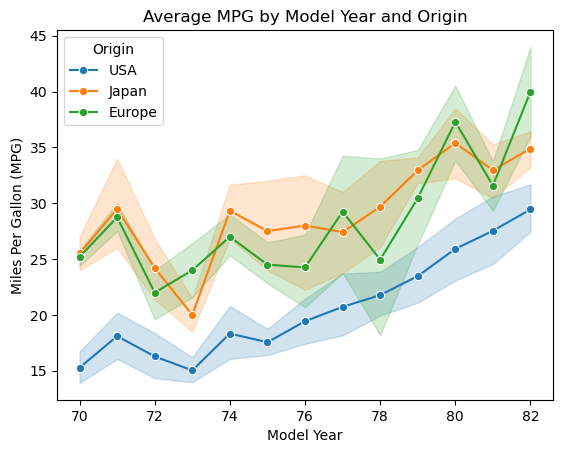

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=mpg_split, x='model year', y='mpg', hue = 'origin', marker='o')
plt.title('Average MPG by Model Year and Origin')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend(title='Origin')
plt.show()

Text(0.5, 0, 'Origin')

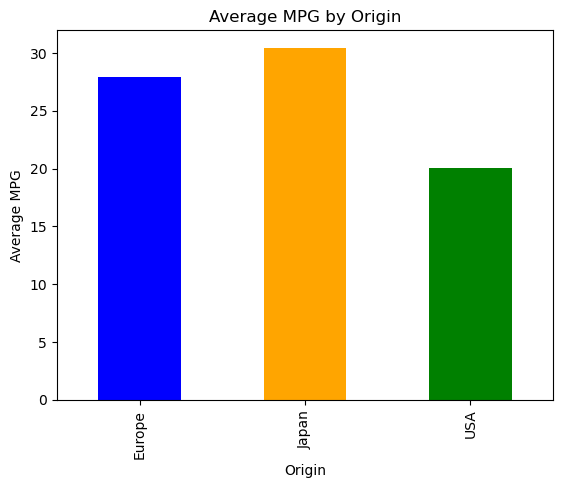

In [36]:
## Bar Chart
mpg_split.groupby('origin')['mpg'].mean().plot(kind='bar', color = ['blue', 'orange', 'green'])
plt.title('Average MPG by Origin')
plt.ylabel('Average MPG')
plt.xlabel('Origin')

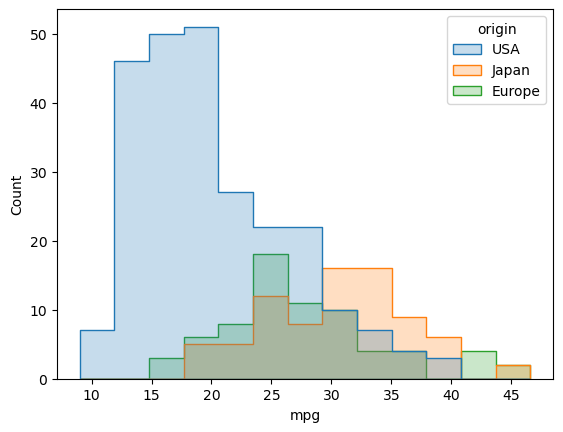

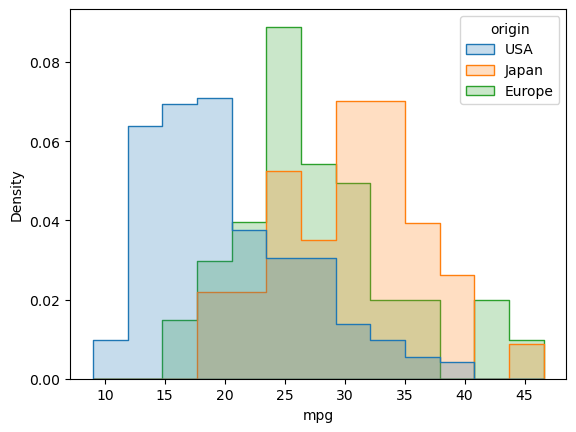

<Axes: xlabel='mpg', ylabel='Density'>

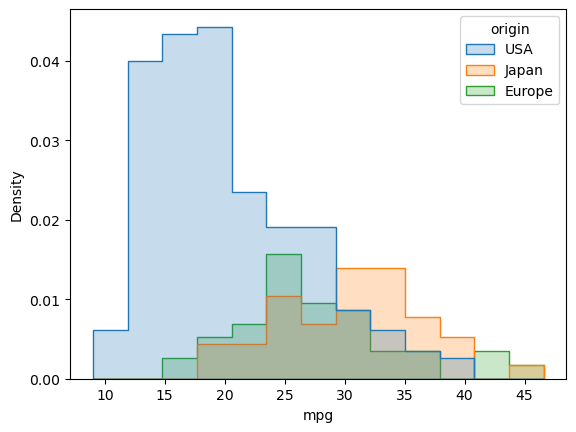

In [37]:
# stat='count' common_norm=True are default settings
sns.histplot(data=mpg_split, x='mpg', hue='origin', element='step', stat='count', common_norm=True)
plt.show()
sns.histplot(data=mpg_split, x='mpg', hue='origin', element='step', stat='density', common_norm=False)
plt.show()
sns.histplot(data=mpg_split, x='mpg', hue='origin', element='step', stat='density', common_norm=True)

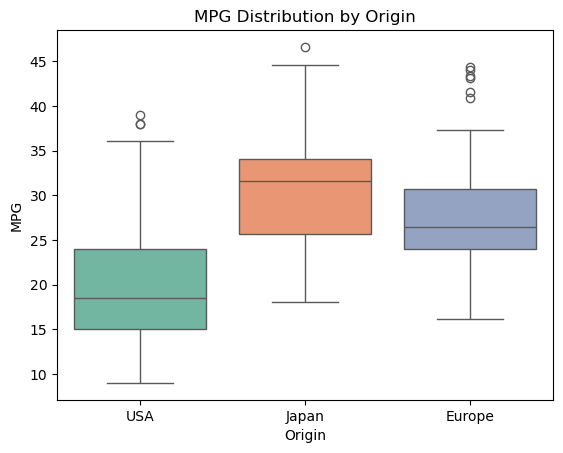

In [38]:
# Box Plot
sns.boxplot(data=mpg_split, x='origin', y='mpg', hue='origin', palette='Set2')
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()

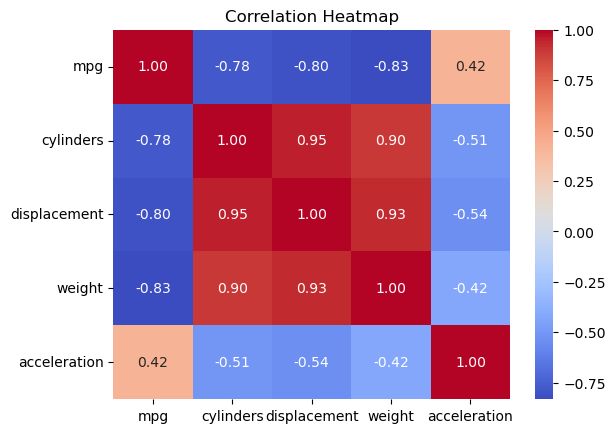

In [39]:
# Heatmap

corr = mpg_split[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

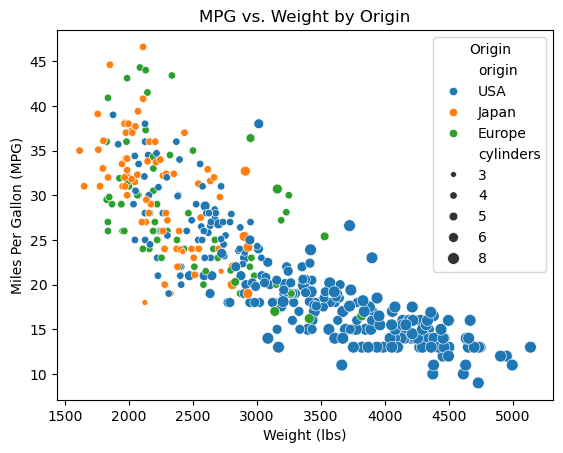

In [40]:
# Scatter Plot
sns.scatterplot(data=mpg_split, 
                x='weight', y='mpg', 
                hue='origin', 
                size='cylinders')
plt.title('MPG vs. Weight by Origin')
plt.xlabel('Weight (lbs)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend(title='Origin')
plt.show()

### Pyplot

To use Plotly in pandas, you need to set the plotting backend to Plotly. This allows you to use the plot method on pandas DataFrames to create interactive plots.

In [41]:
pd.set_option('plotting.backend', 'plotly')

## Reset the plotting backend to its default value
# pd.reset_option('plotting.backend')

In [ ]:
mpg_split.plot(
    kind='scatter',
    x='weight', y='mpg', 
    color='origin', 
    size='cylinders',
    title='MPG vs. Weight by Origin',
    width=800, height=600)

More recommended 

In [ ]:
import plotly.express as px

px.scatter(mpg_split, x='weight', y='mpg', color='origin', 
           size='cylinders', size_max=12,
           hover_data=mpg_split.columns,
           title='MPG vs. Weight by Origin',
           labels={'weight': 'Weight (lbs)', 'mpg': 'Miles Per Gallon (MPG)'},
           width=800, height=600)